<a href="https://colab.research.google.com/github/canbethegodfatherofyourlife/Bollinger_Bands/blob/main/BollingerBands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BOLLINGER BANDS**

Bollinger Bands are a type of price envelope plotted at a standard deviation level above and below a simple moving average of the price.

The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average.


The bands behave like support & resistance and when used in conjuction with SuperTrend / MACD or other indicators can give clear buy-sell signals.

If the price crosses the lower band from below, and two consecutive green candles are formed enter trade at the second candle.

Similarly, if the price crosses the higher band,from above and two consecutive red candles are formed , short sell at the second candle.

**CODE**

In [6]:
import numpy as np
import pandas as pd
import talib as ta
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# input
symbol = 'TSLA'
start = '2020-11-01'
end   = '2021-11-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100
2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700
2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100
2020-11-05,428.299988,440.000000,424.000000,438.089996,438.089996,28414500
2020-11-06,436.100006,436.570007,424.279999,429.950012,429.950012,21706000


In [7]:
n = 20
MA = pd.Series(df['Adj Close'].rolling(n).mean())
STD = pd.Series(df['Adj Close'].rolling(n).std())
bb1 = MA + 2*STD
df['Upper Bollinger Band'] = pd.Series(bb1)
bb2 = MA - 2*STD
df['Lower Bollinger Band'] = pd.Series(bb2)

In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Upper Bollinger Band,Lower Bollinger Band
Date,,,,,,,,
2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,953.421285,699.813713
2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,989.351114,687.970883
2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,1023.755660,679.221336
2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200,1062.047102,671.085900
2021-10-29,1081.859985,1115.209961,1073.209961,1114.000000,1114.000000,29918400,1102.906943,664.104061


<Figure size 432x288 with 0 Axes>

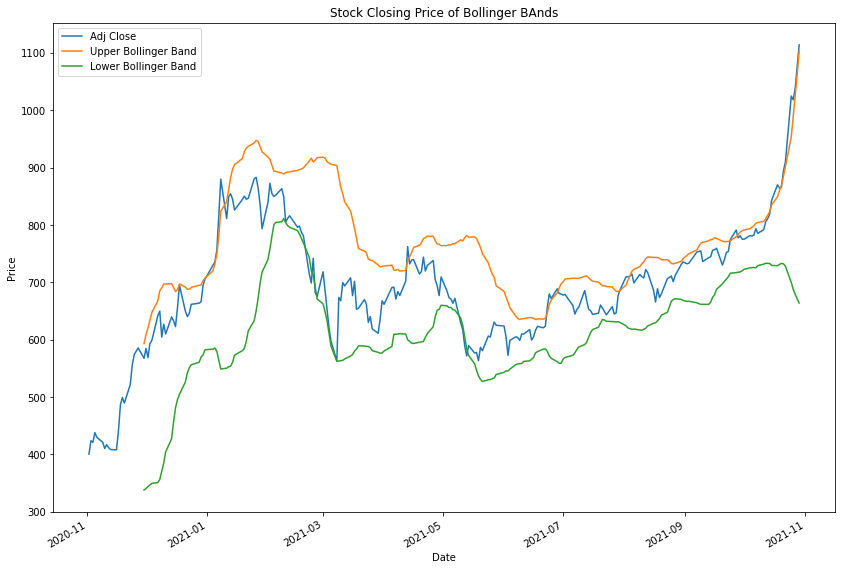

In [10]:
plt.figure()
df[['Adj Close', 'Upper Bollinger Band','Lower Bollinger Band']].plot(figsize=(14,10))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock Closing Price of Bollinger BAnds')
plt.legend(loc='best')